## COGS 108 - Final Project

## Mass shootings in America




## Names and group member IDs

Duy Ngo - A14695298
 <br>Hanyang(Patrick) Liu 
 <br>Behnam Shamloufard 
 <br>Josephine Reyes
 <br>Caleb Lopez
 <br>Fatin Pasha




## 0. Project Outline








**0.1 Data Science Questions**

What is the relationship between the local gun policy and the number of mass shootings happened in that state? More specifically, does a state with a strict gun policy always get fewer mass shooting?


**0.2 Hypothesis**

Since gun regulation and policies vary from state to state across the U.S. , we predict that the number of mass shootings in a state is strongly correlated with how strict its gun policy is. Stricter gun laws will make it less likely for criminals, people with mental health illnesses, and people with histories of violence to have access to guns.  

**0.3 Background and Prior Work**

The recent mass shootings in El Paso, Texas, and Dayton, Ohio – along with many others throughout the year of 2019 alone, have brought our group’s attention to research about mass shootings in the United States. With the US having the highest levels of gun violence compared to any other developed country, we decided to research whether having a stricter gun policy will help decrease the number of mass shootings. 

We also chose the topic of Mass Shootings in the United States because we’re entering an election period and since this is typically a topic of debate, it is crucial for us to objectively analyze this data.

Links: 
https://www.gunviolencearchive.org/methodology

https://www.businessinsider.com/gun-control-research-how-policies-can-reduce-deaths-2019-8#in-2017-the-most-recent-year-for-which-data-is-available-39773-people-in-the-us-died-from-firearms-according-to-the-centers-for-disease-control-and-prevention-cdc-1

https://www.nytimes.com/interactive/2017/10/05/upshot/how-to-reduce-mass-shooting-deaths-experts-say-these-gun-laws-could-help.html

// Need prior researches on the topic 



**0.4 Datasets**

a) Mass shootings record from 2015-2018 <br><br>
Link: https://www.gunviolencearchive.org/reports

Description: This dataset contains the record of every mass shooting in the U.S from 2015 to 2018.
Each data row has the following column: incident date, state, city/county, address, number of people killed and injured. In combination, there are 1,450 observations for us to utilize.

For our research question, we choose to use these columns: Incident date, state, city/county

Definition of mass shooting: Four or more shot and/or killed in a single event [incident], at the same general time and location, not including the shooter.

b) State Population Totals and Components of Change: 2010-2018 <br><br>
Link: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html

Description: (Work in progress) <br><br>
c) Gun Law Score Card<br><br>
Link: https://lawcenter.giffords.org/scorecard/#MT<br><br>
Description: (Work in progress) <br><br>

## 1. Project Setup







**1.1 Import Libraries**

In [330]:
# !pip install geopandas
# !pip install libpysal
# !pip install descartes


In [331]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Erase warnings
import warnings
warnings.filterwarnings("ignore")
#For geo infomation processing
import geopandas as gpd
import libpysal
from shapely.geometry import Point

**1.2 Configure Libraries**

In [332]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 15
pd.options.display.max_columns = 20

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

**1.3 Read data from csv file**

In [333]:
data_2018 = pd.read_csv('2018.csv')
data_2017 = pd.read_csv('2017.csv')
data_2016 = pd.read_csv('2016.csv')
data_2015 = pd.read_csv('2015.csv')

In [334]:
data_2018

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2018",Ohio,Cleveland,4462 Denison Ave,3,2,NaN
1,"December 29, 2018",Ohio,Lima,904 S Main St,1,3,NaN
2,"December 28, 2018",Missouri,Saint Charles,150 Whetstone Dr,4,1,NaN
3,"December 24, 2018",Louisiana,Lutcher,2176 Main St,2,2,NaN
4,"December 23, 2018",Missouri,Springfield,1042 W College St,1,6,NaN
...,...,...,...,...,...,...,...
332,"January 7, 2018",Alabama,Union Springs,US-29,1,5,NaN
333,"January 7, 2018",Florida,Plantation,5225 W Broward Blvd,0,4,NaN
334,"January 5, 2018",Mississippi,Hattiesburg,6168 US 49,0,6,NaN
335,"January 4, 2018",Arkansas,Brinkley,615 W 6th St,1,3,NaN


In [335]:
data_2017

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2017",Colorado,Littleton (Highlands Ranch),3404 E County Line Rd,2,6,NaN
1,"December 31, 2017",Illinois,Chicago,2335 Howard St,0,4,NaN
2,"December 31, 2017",New Jersey,Long Branch,635 Wall St,4,0,NaN
3,"December 27, 2017",Nevada,Las Vegas,3750 E Bonanza Rd,2,2,NaN
4,"December 26, 2017",Florida,Miami,NW 18th Ave and 86th Ter,0,5,NaN
...,...,...,...,...,...,...,...
341,"January 4, 2017",California,Fontana,14520 Village Drive,3,1,NaN
342,"January 3, 2017",Texas,Allen,500 block of Hawthorne Drive,0,4,NaN
343,"January 1, 2017",Mississippi,Winstonville,114 North Greyer Street,0,5,NaN
344,"January 1, 2017",Texas,Dallas,9220 Skillman Street,1,3,NaN


In [336]:
data_2016

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2016",Georgia,Lenox (El Dorado),27 Briarwood Ct,2,2,NaN
1,"December 31, 2016",Texas,Houston,3704 Fannin Street,1,3,NaN
2,"December 30, 2016",Ohio,Mansfield,3230 Possum Run Rd,0,5,NaN
3,"December 30, 2016",Connecticut,Wallingford,95 S Turnpike Rd,2,3,NaN
4,"December 28, 2016",Georgia,Columbus,2914 10th Street,1,4,NaN
...,...,...,...,...,...,...,...
377,"January 11, 2016",Delaware,Wilmington,900 block of Brown Street,1,4,NaN
378,"January 8, 2016",District of Columbia,Washington,1700 E Capitol St NE,0,4,NaN
379,"January 8, 2016",Illinois,Chicago,1500 block of South Kedzie,1,4,NaN
380,"January 7, 2016",Tennessee,Memphis,3800 block of Kerwood Avenue,1,3,NaN


In [337]:
data_2015

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,476321,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,473882,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,472268,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,471867,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,471860,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN
...,...,...,...,...,...,...,...,...
330,274867,"January 6, 2015",Florida,Miami,1300 block of NW 62nd Street,1,3,NaN
331,273535,"January 4, 2015",Virginia,Roanoke,3634 Shenandoah Ave NW,2,4,NaN
332,273397,"January 4, 2015",Texas,Dallas,2000 block of Ben Hur St.,3,1,NaN
333,273965,"January 2, 2015",Georgia,Savannah,500 block of W. 54th Street,1,4,NaN


## 2. Data Wrangling/Cleaning & Pre-processing







**2.1 transform everything into dataframe**

In [338]:
# transform everything into dataframe
df2015 = pd.DataFrame(data_2015)
df2016 = pd.DataFrame(data_2016)
df2017 = pd.DataFrame(data_2017)
df2018 = pd.DataFrame(data_2018)

**2.2 Remove and/or rename unnecessary columns**

In [339]:
#Drop the incident ID column from year 2015
df2015 = df2015.drop(columns=['Incident ID'])
#Drop the Operations and Address columnn in all the datasets
dfs = [df2015, df2016, df2017, df2018]
for df in dfs:
    df.drop(['Operations', 'Address'], inplace=True, axis=1, errors='ignore')


In [340]:
df2015

,Incident Date,State,City Or County,# Killed,# Injured
0,"December 31, 2015",Louisiana,New Orleans,0,6
1,"December 27, 2015",Tennessee,Jackson,0,4
2,"December 26, 2015",Pennsylvania,Philadelphia,0,4
3,"December 25, 2015",Florida,Jacksonville,0,4
4,"December 25, 2015",Alabama,Mobile,0,4
...,...,...,...,...,...
330,"January 6, 2015",Florida,Miami,1,3
331,"January 4, 2015",Virginia,Roanoke,2,4
332,"January 4, 2015",Texas,Dallas,3,1
333,"January 2, 2015",Georgia,Savannah,1,4


**2.3 Sort the datasets by ascending date**

In [341]:
for df in dfs:
    # keep the index order
    idx=df.index.values
    df.iloc[:] = df.iloc[::-1].values
    df.index = idx
df2018

,Incident Date,State,City Or County,# Killed,# Injured
0,"January 1, 2018",Alabama,Huntsville,1,3
1,"January 4, 2018",Arkansas,Brinkley,1,3
2,"January 5, 2018",Mississippi,Hattiesburg,0,6
3,"January 7, 2018",Florida,Plantation,0,4
4,"January 7, 2018",Alabama,Union Springs,1,5
...,...,...,...,...,...
332,"December 23, 2018",Missouri,Springfield,1,6
333,"December 24, 2018",Louisiana,Lutcher,2,2
334,"December 28, 2018",Missouri,Saint Charles,4,1
335,"December 29, 2018",Ohio,Lima,1,3


**2.4 Combine the data from the four years together**


In [342]:
df = pd.concat([df2015, df2016, df2017, df2018], join="inner", ignore_index = True)

In [343]:
df

,Incident Date,State,City Or County,# Killed,# Injured
0,"January 1, 2015",Tennessee,Memphis,0,5
1,"January 2, 2015",Georgia,Savannah,1,4
2,"January 4, 2015",Texas,Dallas,3,1
3,"January 4, 2015",Virginia,Roanoke,2,4
4,"January 6, 2015",Florida,Miami,1,3
...,...,...,...,...,...
1395,"December 23, 2018",Missouri,Springfield,1,6
1396,"December 24, 2018",Louisiana,Lutcher,2,2
1397,"December 28, 2018",Missouri,Saint Charles,4,1
1398,"December 29, 2018",Ohio,Lima,1,3


df['# Injured'].max()

df['# Killed'].max()

df['State'].value_counts()

df['State'].value_counts().plot(kind='bar')

df['# Injured'].value_counts()

df.loc[df['# Injured'] == 0 ]

df['# Killed'].value_counts().plot(kind='bar')

## 3. Data Visualization & Analysis







**Create a new dataframe to store number of mass shootings in each state**


In [344]:
newdf = df[['State']].copy()
#Create a new count column
newdf['Shootings'] = newdf.groupby(['State'])['State'].transform('count')
#drop duplicate rows
newdf = newdf.drop_duplicates(subset=['State'], keep='first')
#Sort by descending number of shootings 
newdf.sort_values(by=['Shootings'], ascending=False)

,State,Shootings
7,California,145
13,Illinois,138
4,Florida,109
2,Texas,88
18,New York,62
...,...,...
138,Rhode Island,1
204,Vermont,1
251,South Dakota,1
437,West Virginia,1


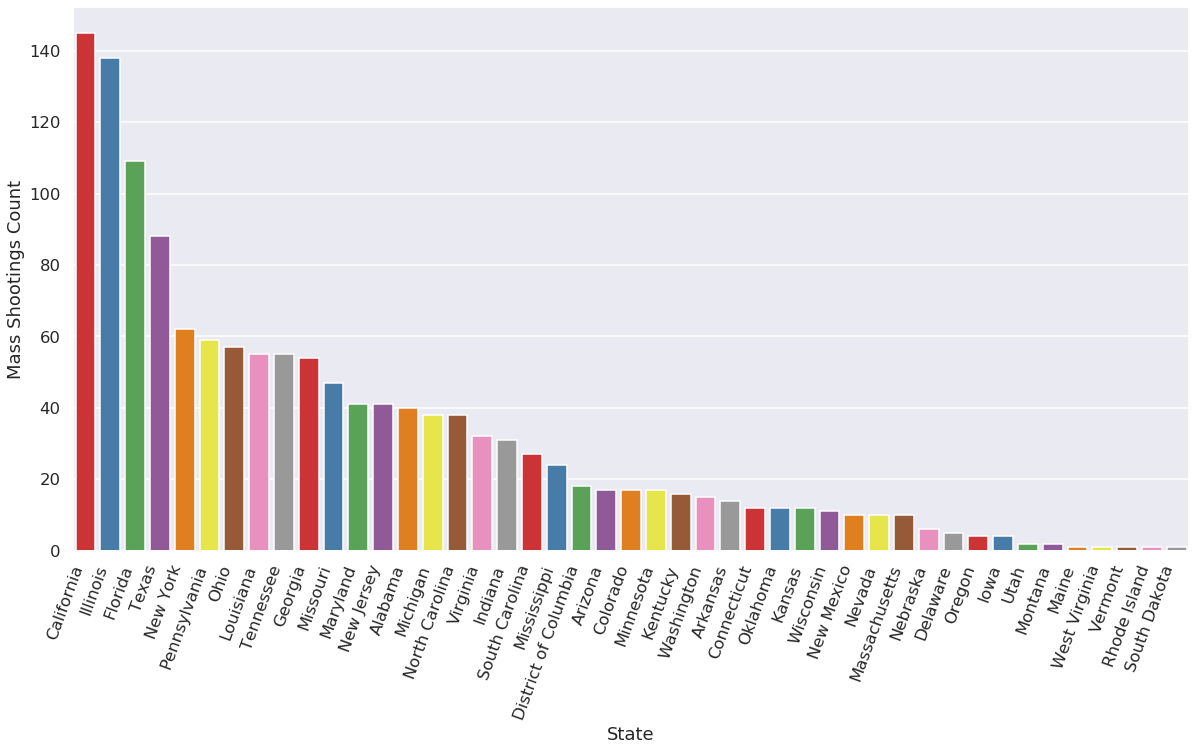

In [345]:
fig=plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=df,
    x='State',
    palette='Set1', order = df['State'].value_counts().index
)
plt.xlabel("State")
plt.ylabel('Mass Shootings Count')

chart.set_xticklabels(chart.get_xticklabels(), rotation=70, horizontalalignment='right')
plt.show(fig)


### Number of Mass Shootings by State from 2015-2018
**Interpretation**

This plot shows that blah blah <br>
Top 3 state is 


**Data Analysis**

What this data mean


---------------------------------------------------c

**Prepare a geotable for geospatial graph**


In [346]:
geo_table = gpd.read_file(libpysal.examples.get_path('us48.shp'))
geo_table

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,20.75,34.96,1,1,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
1,45.13,34.53,2,2,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6..."
2,9.57,18.90,3,3,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ..."
3,21.87,21.35,4,4,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939..."
4,22.60,22.75,5,5,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9..."
...,...,...,...,...,...,...,...,...,...
43,7.79,16.13,45,45,South Carolina,45,S Atl,SC,"MULTIPOLYGON (((-81.75976 33.19523, -81.77004 ..."
44,13.52,20.88,46,46,Arkansas,05,W S Cen,AR,"POLYGON ((-94.46148 34.19666, -94.45241 34.508..."
45,11.22,32.57,47,47,Louisiana,22,W S Cen,LA,"MULTIPOLYGON (((-93.70736 30.23937, -93.69921 ..."
46,13.35,41.09,48,48,Florida,12,S Atl,FL,"MULTIPOLYGON (((-80.78589 28.78493, -80.76264 ..."


**Merge newdf and geo_table**


In [347]:
#Change column state name in order to merge
newdf = newdf.rename(columns={'State': 'STATE_NAME'})
# Merge on state
newdf = newdf.merge(geo_table,on='STATE_NAME')
newdf


,STATE_NAME,Shootings,AREA,PERIMETER,STATE_,STATE_ID,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Tennessee,55,10.88,21.46,39,39,47,E S Cen,TN,"POLYGON ((-83.95470 35.45546, -84.01265 35.407..."
1,Georgia,54,14.60,20.10,44,44,13,S Atl,GA,"MULTIPOLYGON (((-85.13023 31.77869, -85.13163 ..."
2,Texas,88,65.06,64.81,40,40,48,W S Cen,TX,"MULTIPOLYGON (((-105.99836 31.39382, -106.2127..."
3,Virginia,32,10.51,31.20,34,34,51,S Atl,VA,"MULTIPOLYGON (((-79.14433 36.54606, -79.21706 ..."
4,Florida,109,13.35,41.09,48,48,12,S Atl,FL,"MULTIPOLYGON (((-80.78589 28.78493, -80.76264 ..."
...,...,...,...,...,...,...,...,...,...,...
39,South Dakota,1,22.60,22.75,5,5,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9..."
40,Washington,15,20.75,34.96,1,1,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
41,West Virginia,1,6.49,18.20,29,29,54,S Atl,WV,"POLYGON ((-79.23190 38.48037, -79.27260 38.437..."
42,Utah,2,22.97,19.99,23,23,49,Mtn,UT,"POLYGON ((-114.04646 38.13769, -114.04427 38.5..."


In [348]:
# fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
# geodf = gpd.GeoDataFrame(newdf)
# base = geodf.plot(ax=ax, column= 'Shootings', cmap='GnBu', legend=True)
# plt.axis('off')
# plt.title('Number of Mass Shootings by State')
# plt.show()

In [349]:
population = pd.read_csv('population.csv')
population


,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.00,0.00,2.55,2.75,2.70,2.99,3.33,3.32,2.94,3.00
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.65,-5.22,0.85,0.04,-0.40,-0.92,-2.01,-2.43,-1.80,-1.13
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.37,-2.30,-1.04,-0.90,0.04,-0.72,-1.36,-1.23,-0.52,-0.43
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.96,2.78,5.38,5.84,5.29,6.21,7.33,7.23,6.25,6.15
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.48,1.35,2.69,3.23,3.34,4.15,5.13,5.37,4.16,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,40,4,9,53,Washington,6724540,6724540,6742902,6821655,6892876,...,8.79,6.22,6.18,4.99,4.92,7.65,10.70,13.26,13.03,10.31
53,40,3,5,54,West Virginia,1852994,1853001,1854214,1856074,1856764,...,-5.54,-3.88,1.82,0.87,-0.80,-1.76,-2.56,-4.36,-5.36,-3.67
54,40,2,3,55,Wisconsin,5686986,5687282,5690479,5704755,5719855,...,-0.57,-0.17,-0.84,-0.77,0.11,-0.39,-1.06,-0.65,0.72,1.21
55,40,4,8,56,Wyoming,563626,563773,564483,567224,576270,...,-14.69,-6.37,-0.50,10.16,4.95,-4.76,0.29,-7.15,-13.62,-5.34


In [350]:
population = population[['NAME','POPESTIMATE2015', 'POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018']]
population


,NAME,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,United States,320742673,323071342,325147121,327167434
1,Northeast Region,56047587,56058789,56072676,56111079
2,Midwest Region,67869139,67996917,68156035,68308744
3,South Region,121037542,122401186,123598424,124753948
4,West Region,75788405,76614450,77319986,77993663
...,...,...,...,...,...
52,Washington,7163543,7294680,7425432,7535591
53,West Virginia,1841996,1830929,1817048,1805832
54,Wisconsin,5761406,5772958,5792051,5813568
55,Wyoming,585668,584290,578934,577737


In [351]:
population['MEAN_POPULATION'] = population.mean(axis=1)
population = population[['NAME', 'MEAN_POPULATION']]
population

,NAME,MEAN_POPULATION
0,United States,3.24e+08
1,Northeast Region,5.61e+07
2,Midwest Region,6.81e+07
3,South Region,1.23e+08
4,West Region,7.69e+07
...,...,...
52,Washington,7.35e+06
53,West Virginia,1.82e+06
54,Wisconsin,5.78e+06
55,Wyoming,5.82e+05


In [352]:
population = population.rename(columns={'NAME': 'STATE_NAME'})
population = population.merge(geo_table, on='STATE_NAME')
# population['MEAN_POPULATION']=population['MEAN_POPULATION'].apply(float)/10000

population

,STATE_NAME,MEAN_POPULATION,AREA,PERIMETER,STATE_,STATE_ID,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Alabama,4.87e+06,12.90,17.24,42,42,01,E S Cen,AL,"POLYGON ((-85.07014 31.98055, -85.11522 31.907..."
1,Arizona,7.00e+06,28.86,23.26,36,36,04,Mtn,AZ,"POLYGON ((-114.51984 33.02767, -114.55830 33.0..."
2,Arkansas,3.00e+06,13.52,20.88,46,46,05,W S Cen,AR,"POLYGON ((-94.46148 34.19666, -94.45241 34.508..."
3,California,3.93e+07,41.53,42.26,24,24,06,Pacific,CA,"MULTIPOLYGON (((-121.66415 38.16937, -121.7813..."
4,Colorado,5.58e+06,28.04,22.02,31,31,08,Mtn,CO,"POLYGON ((-102.04400 37.64146, -102.04156 37.3..."
...,...,...,...,...,...,...,...,...,...,...
43,Virginia,8.44e+06,10.51,31.20,34,34,51,S Atl,VA,"MULTIPOLYGON (((-79.14433 36.54606, -79.21706 ..."
44,Washington,7.35e+06,20.75,34.96,1,1,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615..."
45,West Virginia,1.82e+06,6.49,18.20,29,29,54,S Atl,WV,"POLYGON ((-79.23190 38.48037, -79.27260 38.437..."
46,Wisconsin,5.78e+06,16.48,21.89,7,7,55,E N Cen,WI,"MULTIPOLYGON (((-87.74845 44.96163, -87.83989 ..."


In [353]:
# fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
# gpd_population = gpd.GeoDataFrame(population)
# base = gpd_population.plot(ax=ax, column= 'MEAN_POPULATION', cmap='GnBu', legend=True)
# plt.axis('off')
# plt.title('State Population')
# plt.show()

In [354]:
dfcoord = pd.read_csv('uscities.csv')
dfcoord = dfcoord[['city','lat', 'lng']]
# dfcoord.loc[dfcoord['city'] == 'Dallas']
dfcoord = dfcoord.drop_duplicates(subset='city', keep="first")
dfcoord


,city,lat,lng
0,South Creek,47.00,-122.39
1,Roslyn,47.25,-121.10
2,Sprague,47.30,-117.97
3,Gig Harbor,47.34,-122.60
4,Lake Cassidy,48.06,-122.09
...,...,...,...
28878,Lake Norden,44.58,-97.21
28880,Colome,43.26,-99.72
28881,Okreek,43.35,-100.38
28883,Willow Lake,44.63,-97.64


In [355]:
temp = df.rename(columns={'City Or County': 'city'})
temp = temp.merge(dfcoord, on='city')
# temp = temp.sort_values(by = ['lng'])
# Remove outlier
temp = temp[temp.lng > -125]


In [356]:
# Add geometry column to plot 
geometry=pd.Series()
for i in temp.index:
    geometry.loc[i]=Point((temp.loc[i,'lng'],temp.loc[i,'lat']))
temp['geometry']=geometry
temp

,Incident Date,State,city,# Killed,# Injured,lat,lng,geometry
0,"January 1, 2015",Tennessee,Memphis,0,5,27.54,-82.56,POINT (-82.5607 27.5435)
1,"August 30, 2015",Tennessee,Memphis,1,4,27.54,-82.56,POINT (-82.5607 27.5435)
2,"October 10, 2015",Tennessee,Memphis,0,6,27.54,-82.56,POINT (-82.5607 27.5435)
3,"January 7, 2016",Tennessee,Memphis,1,3,27.54,-82.56,POINT (-82.5607 27.5435)
4,"April 9, 2016",Tennessee,Memphis,0,4,27.54,-82.56,POINT (-82.5607 27.5435)
...,...,...,...,...,...,...,...,...
1276,"November 13, 2018",New Mexico,Gallup,4,1,35.52,-108.74,POINT (-108.7423 35.5183)
1277,"November 25, 2018",Alabama,Demopolis,2,2,32.50,-87.83,POINT (-87.82980000000001 32.498)
1278,"November 26, 2018",Tennessee,Powell,0,4,44.80,-108.77,POINT (-108.7682 44.7963)
1279,"December 11, 2018",Louisiana,Natchitoches,1,3,31.73,-93.10,POINT (-93.0979 31.7317)


In [357]:
#Add a count of shootings col for each city
temp['city_count'] = temp.groupby(['city'])['city'].transform('count')
# temp

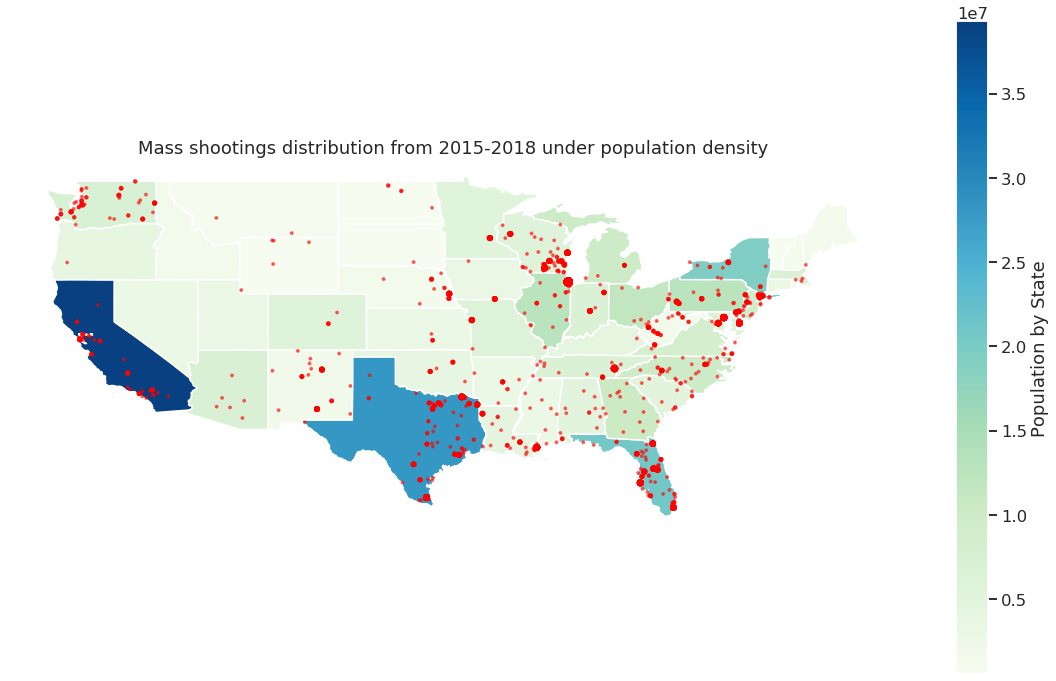

In [358]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (20,12)) # figsize to be changed
gpd_population = gpd.GeoDataFrame(population)
# tempgpd = gpd.GeoDataFrame(temp)
base = gpd_population.plot(ax=ax, column= 'MEAN_POPULATION', cmap='GnBu', legend=True,
                          legend_kwds={'label': "Population by State"})
leg = ax.get_legend()
# tempgpd.plot(ax=base, marker='o', color='red',markersize=5)
plt.scatter(y=temp["lat"], x = temp["lng"], alpha = 0.5, marker='o', color='red', s=6*np.sqrt(temp['city_count'])) #adjust size of dot by city count
plt.axis('off')
plt.title('Mass shootings distribution from 2015-2018 under population density')
plt.show()

### Mass shootings distribution from 2015-2018 under population density

**Interpretation**

This plot shows blah, where each red dot is a mass shooting at a city. You can see that bah.
Red dots size scale 
Not uniformly distributed 


**Data Analysis**

What this data mean


In [359]:
# Read data of gun law by state into a dataframe
df_gunpolicy = pd.read_csv('gunlawstrength.csv')
df_gunpolicy

,GUN LAW STRENGTH (RANKED),STATE,2018 GRADE,GUN DEATH RATE (RANKED),GUN DEATH RATE (PER 100K)
0,1,California,A,44,7.8
1,2,New Jersey,A,45,5.3
2,3,Connecticut,A-,46,5.1
3,4,Maryland,A-,29,12.3
4,5,Massachusetts,A-,49,3.7
...,...,...,...,...,...
45,46,Arizona,F,18,15.7
46,47,Missouri,F,6,21.3
47,48,Idaho,F,15,16.4
48,48,Wyoming,F,8,18.7


In [360]:
#Merge this df with geo_table for geospatial plot
df_gunpolicy = df_gunpolicy.rename(columns={'STATE': 'STATE_NAME'})
df_gunpolicy = df_gunpolicy.merge(geo_table, on='STATE_NAME')
# df_gunpolicy


In [361]:
#Add a coords column to add labels to the states
df_gunpolicy['coords'] = df_gunpolicy['geometry'].apply(lambda x: x.representative_point().coords[:])
df_gunpolicy['coords'] = [coords[0] for coords in df_gunpolicy['coords']]
df_gunpolicy

,GUN LAW STRENGTH (RANKED),STATE_NAME,2018 GRADE,GUN DEATH RATE (RANKED),GUN DEATH RATE (PER 100K),AREA,PERIMETER,STATE_,STATE_ID,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,coords
0,1,California,A,44,7.8,41.53,42.26,24,24,06,Pacific,CA,"MULTIPOLYGON (((-121.66415 38.16937, -121.7813...","(-120.00924331104378, 37.29582595825195)"
1,2,New Jersey,A,45,5.3,2.06,8.42,20,20,34,Mid Atl,NJ,"POLYGON ((-75.48964 39.71474, -75.47633 39.719...","(-74.37764544111192, 40.16340637207031)"
2,3,Connecticut,A-,46,5.1,1.39,5.72,18,18,09,N Eng,CT,"POLYGON ((-73.53082 41.52265, -73.51758 41.665...","(-72.66026049545243, 41.56192970275879)"
3,4,Maryland,A-,29,12.3,2.62,21.88,30,30,24,S Atl,MD,"MULTIPOLYGON (((-75.71106 38.64955, -75.70742 ...","(-76.72408804171778, 38.85972785949707)"
4,5,Massachusetts,A-,49,3.7,2.31,13.11,14,14,25,N Eng,MA,"MULTIPOLYGON (((-71.31983 41.77209, -71.34030 ...","(-72.09162515290728, 42.19374084472656)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,46,Arizona,F,18,15.7,28.86,23.26,36,36,04,Mtn,AZ,"POLYGON ((-114.51984 33.02767, -114.55830 33.0...","(-111.67611563511193, 34.15624809265137)"
44,47,Missouri,F,6,21.3,18.65,23.60,35,35,29,W N Cen,MO,"POLYGON ((-89.10497 36.95387, -89.12959 36.866...","(-92.49264906395838, 38.27892875671387)"
45,48,Idaho,F,15,16.4,24.39,28.53,8,8,16,Mtn,ID,"POLYGON ((-117.02531 43.67915, -117.02280 43.7...","(-115.47965192564584, 45.49642753601074)"
46,48,Wyoming,F,8,18.7,27.97,21.99,6,6,56,Mtn,WY,"POLYGON ((-104.05311 41.69825, -104.05499 41.5...","(-107.55158804185346, 42.80889892578125)"


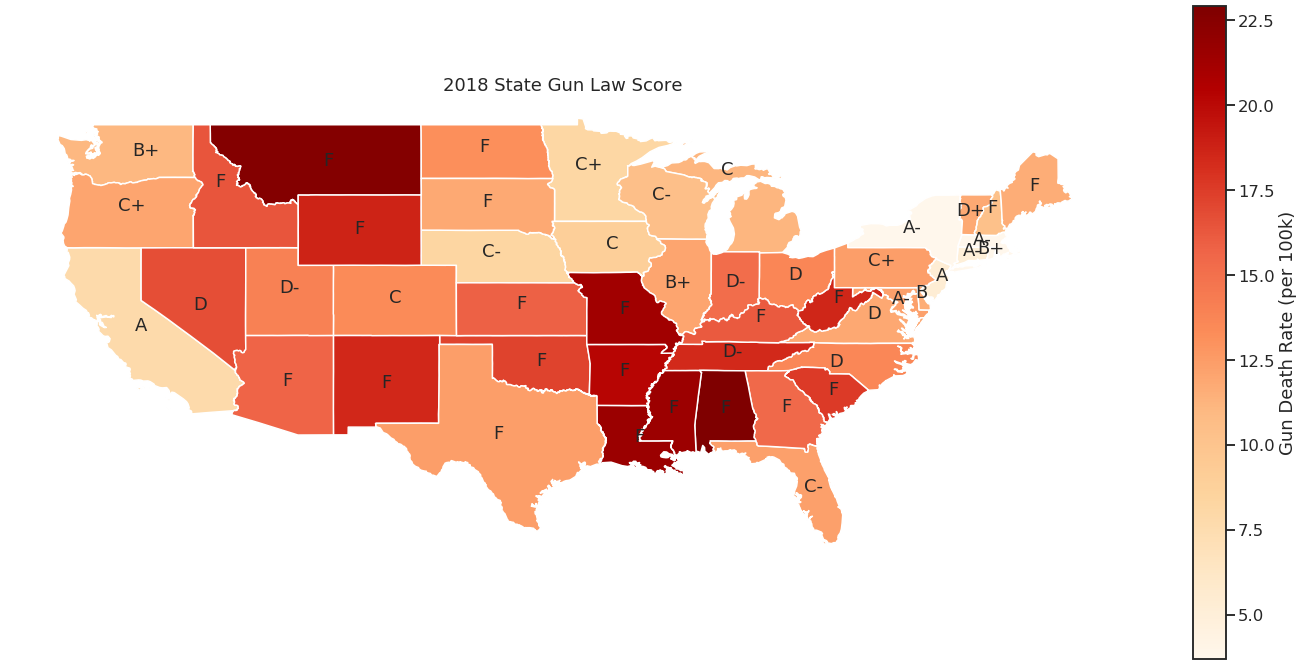

In [371]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
gpd_gunpolicy = gpd.GeoDataFrame(df_gunpolicy)
base = gpd_gunpolicy.plot(ax=ax, column= 'GUN DEATH RATE (PER 100K)', cmap='OrRd', legend=True, legend_kwds={'label': "Gun Death Rate (per 100k)"})
for idx, row in gpd_gunpolicy.iterrows():
    plt.annotate(s=row['2018 GRADE'],xy=row['coords'],
                 horizontalalignment='center')
# Optional: Scatter to show the shootings
# plt.scatter(y=temp["lat"], x = temp["lng"], alpha = 0.5, marker='o', color='red', s=10*np.sqrt(temp['city_count']))
plt.axis('off')
plt.title('2018 State Gun Law Score ')
plt.show()


### 2018 State Gun Law Score

**Interpretation**

This plot shows blah, where each red dot is a mass shooting at a city. You can see that bah.
Red dots size scale 
Not uniformly distributed 


**Data Analysis**

What this data mean


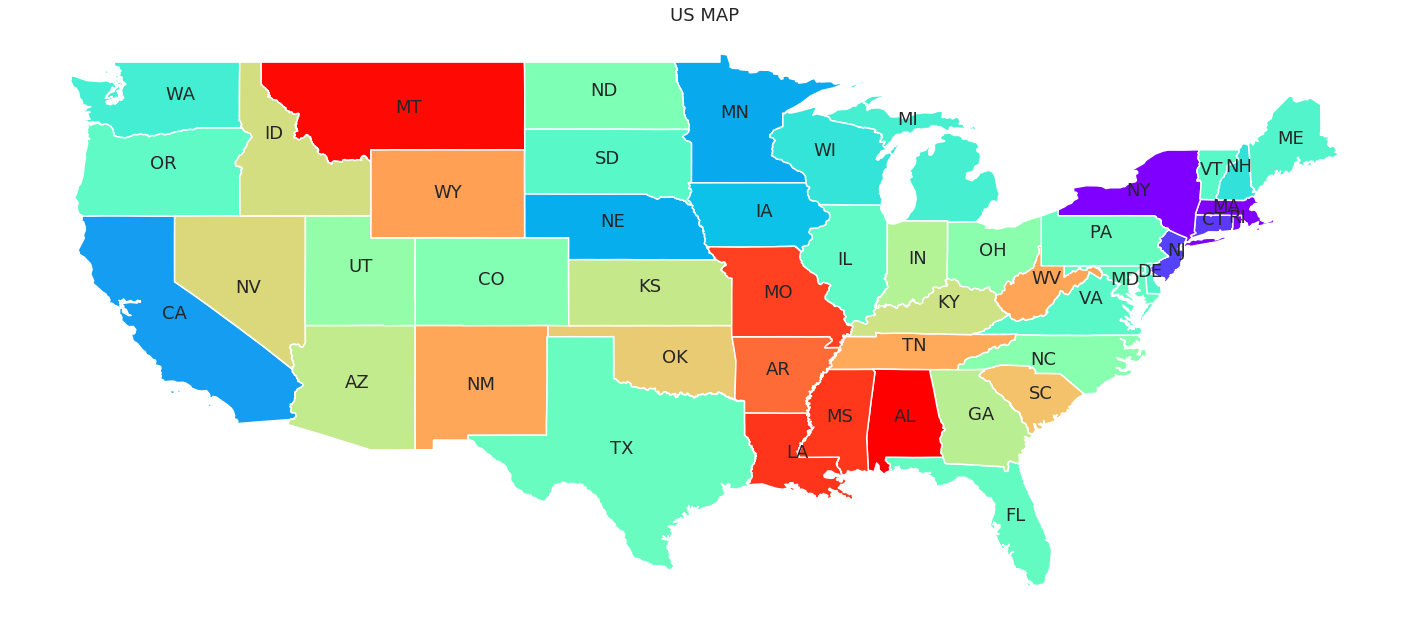

In [363]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
gpd_gunpolicy = gpd.GeoDataFrame(df_gunpolicy)
base = gpd_gunpolicy.plot(ax=ax, column= 'GUN DEATH RATE (PER 100K)', cmap='rainbow')
for idx, row in gpd_gunpolicy.iterrows():
    plt.annotate(s=row['STATE_ABBR'],xy=row['coords'],
                 horizontalalignment='center')
plt.axis('off')
plt.title('US MAP')
plt.show()


In [368]:
#Merge mass shootings df and gun law df
df_scatter = newdf.merge(df_gunpolicy,on='STATE_NAME')
# df_scatter

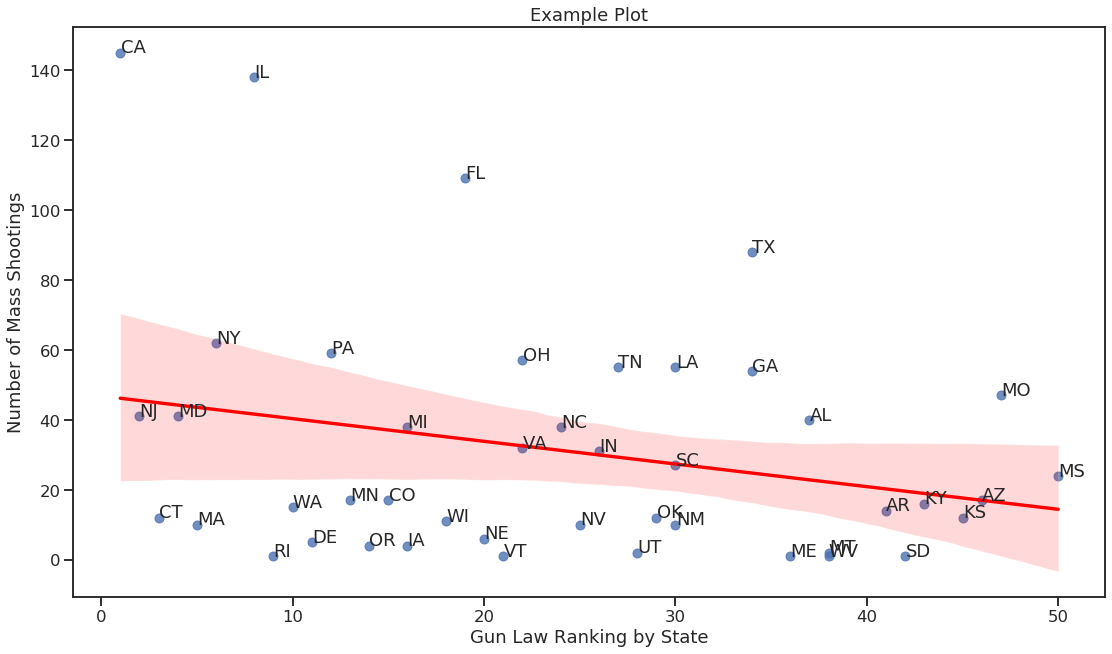

In [370]:
# df_scatter.plot.scatter(x='GUN LAW STRENGTH (RANKED)', y='Shootings')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x="GUN LAW STRENGTH (RANKED)", y="Shootings", data=df_scatter, line_kws={"color": "red"}, truncate=True)
plt.title('Example Plot')
# Set x-axis label
plt.xlabel('Gun Law Ranking by State')
# Set y-axis label
plt.ylabel('Number of Mass Shootings') # Change to just 2018??

# Function to label the points as states
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_scatter['GUN LAW STRENGTH (RANKED)'], df_scatter['Shootings'], df_scatter['STATE_ABBR_x'], plt.gca())

plt.show()

